## 1. Line regression
### 1.1 Ordinary Least Squares (OLS) Perspective

#### 1.1.1 Model Representation:
The linear regression model is represented as:
$$
\hat{Y} = X\theta
$$
where:
- $ X $ is the design matrix with dimensions $ n \times (m+1) $ (including the intercept term).
- $ \theta$ is the parameter vector with dimensions $ (m+1) \times 1 $.

#### 1.1.2 Loss Function:
The mean squared error (MSE) is given by:
- No regularization
$$
J(\theta) = \frac{1}{n}(X\theta - Y)^T(X\theta - Y)
$$
- L1 regularization
$$
J(\theta) = \frac{1}{n}(X\theta - Y)^T(X\theta - Y) + \lambda \|\mathbf{\theta}\|_1
$$
- L2 regularization
$$
J(\theta) = \frac{1}{n}(X\theta - Y)^T(X\theta - Y) + \lambda\theta^T\theta
$$

#### 1.1.3 Objective:
Given a dataset with $n$ samples and $m$ features, we want to find the parameter vector $\theta$ that minimizes the mean squared error (MSE) between predicted values $\hat{Y}$ and actual values $y$.
$$
\theta = \arg\min_\theta{J(\theta)}
$$

#### 1.1.4 Solution:
1. **Gradient of $\theta$:**
    - No regularization
$$
\frac{\partial J}{\partial \theta} = \frac{2}{n}X^T(X\theta - y)
$$
    - L1 regularization
$$
\frac{\partial J}{\partial \theta} = \frac{2}{n}X^T(X\theta - y)+\lambda \text{sign}(\mathbf{\theta})
$$
    - L2 regularization
$$
\frac{\partial J}{\partial \theta} = \frac{2}{n}X^T(X\theta - y)+2\lambda\theta
$$
2. **Closed-Form for $\theta$:**
    - No regularization
$$
\begin{equation}
\begin{split}
& \frac{2}{n}X^T(X\theta - y) = 0 \\
& X^TX\theta - X^Ty = 0 \\
& \theta = (X^TX)^{-1}X^Ty
\end{split}
\end{equation}
$$
    - L1 regularization
    
    The closed-form solution for OLS with L1 penalty doesn't have a direct analytical solution due to the non-differentiability of the L1 norm. However, it can be solved using optimization algorithms like coordinate descent or proximal gradient descent. These algorithms iteratively update the coefficients until convergence.
    
    - L2 regularization
$$
\begin{equation}
\begin{split}
& \frac{2}{n}X^T(X\theta - y)+2\lambda\theta = 0 \\
& (X^TX+\lambda n I)\theta = X^Ty \\
& \theta = (X^T X + \lambda n I)^{-1} X^Ty
\end{split}
\end{equation}
$$

### 1.2 Maximum Likelihood Estimation Perspective

#### 1.2.1 Model Representation:
The linear regression model is represented as:
$$
y^{(i)} = x^{(i)T}\theta + \epsilon
$$
where:
- $x^{(i)}$ is the $i$th example which is a vector with dimensions $ (m+1) \times 1 $. (including the intercept term).
- $\theta$ is the parameter vector with dimensions $ (m+1) \times 1 $.
- $\epsilon $ is the error term assumed to be normally distributed with mean zero and variance $ \sigma^2 $, that is  $\epsilon\sim{N(0,\sigma^2)}$.
- $y^{(i)}|x^{(i)},\theta\sim{N(x^{(i)T}\theta,\sigma^2)}$.

#### 1.2.2 Likelihood and posterior Function:
Under the assumption of Gaussian errors, the likelihood function of the observed data is given by the product of the probability density functions of the individual observations:
- No regularization
$$
\begin{equation}
\begin{split}
P(X,Y|\theta) &= P(Y|X,\theta)*P(X|\theta) \\
&\propto P(Y|X,\theta) \\
& = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y^{(i)} - x^{(i)}\theta)^2}{2\sigma^2}\right) \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{\sum_{i=1}^{n} (y^{(i)} - x^{(i)}\theta)^2}{2\sigma^2}\right)} \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)}{2\sigma^2}\right)}
\end{split}
\end{equation}
$$
- L1 regularization

We assume $\theta\sim{Laplace(0,b)}$, so the priori probability of $\theta$ is
$$
P(\theta) = \frac{1}{2b}\exp{(-\frac{\left|\theta\right|}{b})}
$$
The posterior probability of $\theta$ is
$$
\begin{equation}
\begin{split}
P(\theta|X,Y) &= \frac{P(X,Y,\theta)}{P(X,Y)} \\
& \propto P(X,Y,\theta) \\
& = P(Y|X,\theta)*P(X|\theta)*P(\theta) \\
& \propto P(Y|X,\theta)*P(\theta) \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)}{2\sigma^2}\right)} * \frac{1}{2b}\exp{(-\frac{\left|\theta\right|}{b})} \\
& = \frac{1}{2b\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)+\frac{2\sigma^2}{b}\left|\theta\right|}{2\sigma^2}\right)}\\
\end{split}
\end{equation}
$$
- L2 regularization

We assume $\theta\sim{N(0,\Sigma)}$, so the priori probability of $\theta$ is
$$
P(\theta) = \frac{1}{(\sqrt{2\pi})^m\left|\Sigma\right|^\frac{1}{2}}\exp{(-\frac{\theta^T\Sigma^{-1}\theta}{2})}
$$
The posterior probability of $\theta$ is
$$
\begin{equation}
\begin{split}
P(\theta|X,Y) & \propto P(Y|X,\theta)*P(\theta) \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)}{2\sigma^2}\right)} * \frac{1}{(\sqrt{2\pi})^m\left|\Sigma\right|^\frac{1}{2}}\exp{(-\frac{\theta^T\Sigma^{-1}\theta}{2})} \\
&\propto \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)+\sigma^2\theta^T\Sigma^{-1}\theta}{2\sigma^2}\right)}\\
\end{split}
\end{equation}
$$
#### 1.2.3 Objective:
We seek to find the parameter vector $\theta$ that maximizes the likelihood or posterior function of the observed data
- No regularization
$$
\theta = \arg\max_\theta{P(X,Y|\theta)}=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}= \arg\min_\theta{J(\theta)}
$$
- L1 regularization
$$
\theta = \arg\max_\theta{P(\theta|X,Y)}=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\frac{2\sigma^2}{b}\left|\theta\right|=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\lambda\left|\theta\right|= \arg\min_\theta{J(\theta)}
$$
- L2 regularization
$$
\theta = \arg\max_\theta{P(\theta|X,Y)}=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\sigma^2\theta^T\Sigma^{-1}\theta=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\lambda\theta^T\theta= \arg\min_\theta{J(\theta)}
$$
Although the object function is different, the form is the same with OLS.

### 1.3. Column space Perspective
![](https://pic1.zhimg.com/80/v2-437c1820680c560b2a7096977ce2e3a1_1440w.webp?source=1def8aca)
If we take $X\theta$ as a vector from the column space of $X$, then $X\theta - Y$ is the residual vector, and $(X\theta - Y)^T(X\theta - Y)$ is the square of residual vector magnitude. So Minimizing MSE is equivalent to find the shortest residual vector which is orthogonal to the column space, that is:

$$
\begin{equation}
\begin{split}
& X^T(X\theta - Y) = 0 \\
& X^TX\theta =X^TY \\
& \theta = (X^TX)^{-1}X^TY
\end{split}
\end{equation}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, method='closed_form', reg=None, alpha=0.01):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.method = method  # Method: 'closed_form' for closed-form solution, 'gradient_descent' for gradient descent
        self.theta = None  # Parameters
        self.reg = reg  # Regularization method: None (no penalty), 'l1' (L1 regularization), 'l2' (L2 regularization)
        self.alpha = alpha  # Regularization parameter
        self.loss_history = [] # Loss record

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'closed_form':
            # Closed-form solution
            if self.reg is None:
                # No regularization
                self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            elif self.reg == 'l1':
                # L1 regularization (Lasso)
                L = np.eye(X_b.shape[1])
                L[0, 0] = 0  # No penalty for the bias term
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * L).dot(X_b.T).dot(y)
            elif self.reg == 'l2':
                # L2 regularization (Ridge)
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
        elif self.method == 'gradient_descent':
            # Initialize parameters
            self.theta = np.random.randn(X_b.shape[1], 1)
            # Gradient descent
            for _ in range(self.epochs):
                gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(self.theta) - y)
                if self.reg == 'l1':
                    # L1 regularization (Lasso)
                    gradients[1:] += self.alpha * np.sign(self.theta[1:])
                elif self.reg == 'l2':
                    # L2 regularization (Ridge)
                    gradients[1:] += 2 * self.alpha * self.theta[1:]
                self.theta -= self.lr * gradients
                loss = np.mean((X_b.dot(self.theta) - y) ** 2)
                self.loss_history.append(loss)
        else:
            raise ValueError("Unsupported method. Choose 'closed_form' or 'gradient_descent'.")

    def predict(self, X):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


In [16]:
# Generate some random data
np.random.seed(42)
X_org = np.random.rand(100, 1)
# Introduce outliers
# X = np.linspace(0,100,100)
y_org = 4 + 3 * X_org + np.random.randn(100, 1)
X_outliers = np.array([[1], [1.01], [1.02],[1.03], [1.04], [1.05]])
y_outliers = np.array([[30], [35], [39],[40], [41], [42]])
X = np.vstack((X_org, X_outliers))
y = np.vstack((y_org, y_outliers))
methods = ['closed_form','gradient_descent']
regs = [None,'l1','l2']
# Instantiate and fit the models
# No penalty (ordinary linear regression)
models = {}
for m in methods:
    for r in regs:
        models['{}_{}'.format(m,r)] = LinearRegression(method=m,reg=r,alpha=10)
        models['{}_{}'.format(m,r)].fit(X,y)
w, b = [], []
for k in models:
    p = models[k].theta.ravel()
    w.append(p[0])
    b.append(p[1])
df = pd.DataFrame({'solution':list(models.keys()),'w':w,'b':b})
df

,solution,w,b
0,closed_form_None,1.301655,11.848666
1,closed_form_l1,4.199940,6.070421
2,closed_form_l2,3.450970,6.914557
3,gradient_descent_None,2.157985,10.274356
4,gradient_descent_l1,7.233404,0.119167
5,gradient_descent_l2,7.186451,0.116280


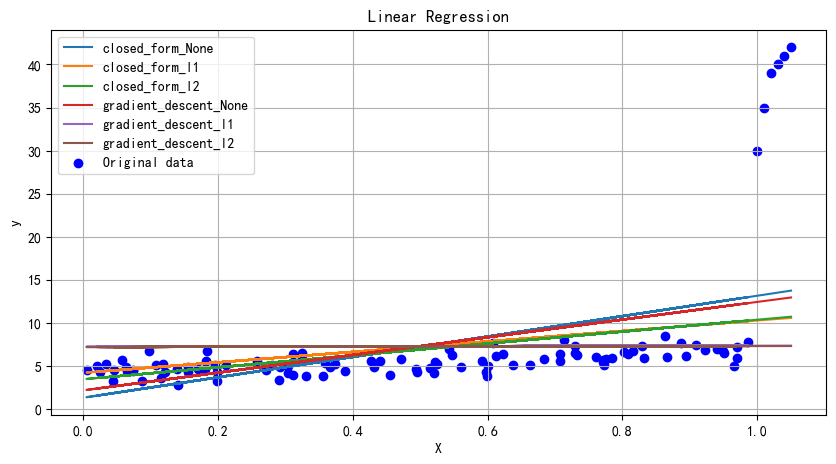

In [3]:
# Visualize data and fitted models
plt.figure(figsize=(10, 5))

# Scatter plot of original data
plt.scatter(X, y, color='blue', label='Original data')

# Fitted lines for closed-form solution and gradient descent
for m in methods:
    for r in regs:
        plt.plot(X, models['{}_{}'.format(m,r)].predict(X), label='{}_{}'.format(m,r))
# plt.plot(X, lin_reg_no_penalty_gd.predict(X), color='red', label='Gradient descent')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

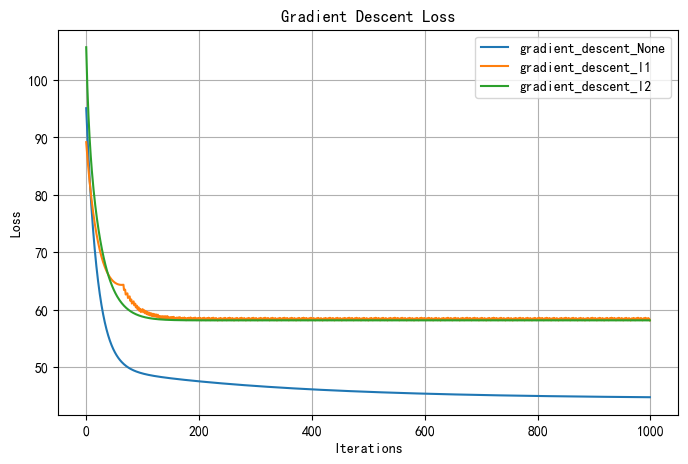

In [4]:
# Plot loss change during gradient descent
plt.figure(figsize=(8, 5))
for r in regs:
    # plt.plot(X, models['{}_{}'.format(m,r)].predict(X), label='{}_{}'.format(m,r))
    plt.plot(range(len(models['{}_{}'.format(methods[1],r)].loss_history)), 
             models['{}_{}'.format(methods[1],r)].loss_history, 
             label='{}_{}'.format(methods[1],r))
plt.title('Gradient Descent Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## 2. Bayesian Line regression

Bayesian regression is a probabilistic approach to regression analysis that incorporates prior knowledge about the model parameters into the modeling process. Unlike classical regression methods, Bayesian regression provides a framework for modeling uncertainty in the parameters and making probabilistic predictions.

### 2.1 Model Representation

In Bayesian regression, we model the relationship between the independent variables $X$ and the dependent variable $Y$ using a probabilistic model. The key components of the model are:

- **Likelihood**: This represents the conditional distribution of the dependent variable $y$ given the independent variables $X$ and the model parameters $\theta$. It is typically assumed to be Gaussian:

$$
p(Y|X, \theta) = \mathcal{N}(X\theta, \sigma^2 I)
$$

- **Prior**: This represents our beliefs about the distribution of the model parameters $\theta$ before observing any data. It is specified as a probability distribution, often chosen to be a Gaussian distribution:

$$
p(\theta) = \mathcal{N}(\mu, \Sigma)
$$

3. **Posterior**: This represents the updated beliefs about the parameters after observing the data $X$ and $Y$. According to Bayes' theorem, the posterior is proportional to the likelihood times the prior:

$$
p(\theta|X, Y) \propto p(Y|X, \theta) \cdot p(\theta)
$$

### 2.2 Model Learning

The goal of learning in Bayesian regression is to estimate the posterior distribution of the model parameters $\theta$ given the observed data $X$ and $Y$. This involves updating the prior distribution using Bayes' theorem to obtain the posterior distribution.

According to the problem description, assuming the prior distribution is a multivariate Gaussian distribution $N(\mu, \Sigma)$, hence:

$$
p(\theta) = \frac{1}{\sqrt{(2\pi)^p \lvert \Sigma \rvert}} \exp\left(-\frac{1}{2}(\theta - \mu)^T \Sigma^{-1} (\theta - \mu)\right)
$$

The likelihood function is given by:

$$
p(Y|X, \theta) = \frac{1}{\sqrt{(2\pi)^n\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(Y - X\theta)^T(Y - X\theta)\right)
$$

Therefore, the expression for the posterior probability is:

$$
\begin{equation}
\begin{split}
p(\theta|X, Y) & \propto \exp\left(-\frac{1}{2}\left[\sigma^{-2}(Y - X\theta)^T(Y - X\theta) + (\theta - \mu)^T \Sigma^{-1} (\theta - \mu)\right]\right) \\
& \propto \exp(-\frac{1}{2}[\theta^T(\frac{X^TX}{\sigma^2}+\Sigma^{-1})\theta-2\theta^T(\frac{X^TY}{\sigma^2}+\Sigma^{-1}\mu)])
\end{split}
\end{equation}
$$

As both the prior distribution $p(\theta)$ and the likelihood function $p(Y|X, \theta)$ are Gaussian distributions, then the posterior probability will be a Gaussian distribution. In this case, we can calculate the mean and variance of the posterior probability. If we assume posterior probability is a multivariate Gaussian distribution $N(\mu_{\text{post}}, \Sigma_{\text{post}})$, hence:

$$
\begin{equation}
\begin{split}
p(\theta|X, Y) &= \frac{1}{\sqrt{(2\pi)^p \lvert \Sigma_{\text{post}} \rvert}} \exp\left(-\frac{1}{2}(\theta - \mu_{\text{post}})^T \Sigma_{\text{post}}^{-1} (\theta - \mu_{\text{post}})\right) \\
&= \frac{1}{\sqrt{(2\pi)^p \lvert \Sigma_{\text{post}} \rvert}} \exp\left(-\frac{1}{2}[\theta^T\Sigma_{\text{post}}^{-1}\theta-2\theta^T\Sigma_{\text{post}}^{-1}\mu_{\text{post}}+\mu_{\text{post}}^T\Sigma_{\text{post}}^{-1}\mu_{\text{post}}]\right) \\
& \propto \exp(-\frac{1}{2}[\theta^T(\frac{X^TX}{\sigma^2}+\Sigma^{-1})\theta-2\theta^T(\frac{X^TY}{\sigma^2}+\Sigma^{-1}\mu)])
\end{split}
\end{equation}
$$
So the covariance matrix \(\Sigma_{\text{post}}\) of the posterior distribution:

$$
\Sigma_{\text{post}} = (\frac{X^TX}{\sigma^2}+\Sigma^{-1})^{-1}
$$

The mean vector \(\mu_{\text{post}}\) of the posterior distribution:

$$
\mu_{\text{post}} = \Sigma_{\text{post}}(\frac{X^TY}{\sigma^2}+\Sigma^{-1}\mu)
$$

That is

$$
p(\theta|X, Y) \sim N(\Sigma_{\text{post}}(\frac{X^TY}{\sigma^2}+\Sigma^{-1}\mu),(\frac{X^TX}{\sigma^2}+\Sigma^{-1})^{-1})
$$

### 2.3 Model Inference
The prediction of Bayesian linear regression is to get the predictive distribution of target value $y_*$ when given input feature vector $x_*$ which can be obtained from the posterior probability distribution. As the predictive distribution can be represented as a Gaussian distribution, it can be written as:

$$
p(y_* | x_*, X, y, \alpha) = \mathcal{N}(\mu_*, \sigma_*^2)
$$

$\mu_*$ is the mean of the predicted target value $y_*$, and $\sigma_*^2$ is the variance of the predicted target value $y_*$, which can be calculated using the following formulas:

$$ 
\begin{equation}
\begin{split}
\mu_* &= \mathbb{E}[y_*] \\
&= \mathbb{E}[x_*^T\theta_{\text{post}} + \epsilon] \\
&=x_*^T \mathbb{E}[\theta_{\text{post}}] \\
&=x_*^T\mu_{\text{post}}
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
\sigma_*^2 &= \text{Var}[y_*] \\
&= \text{Var}[x_*^T\theta_{\text{post}} + \epsilon] \\
&= \text{Var}[x_*^T\theta_{\text{post}}] + \text{Var}[\epsilon] \\
&= x_*^T\text{Var}[\theta_{\text{post}}]x_* + \sigma^2  \\
&= \sigma^2  + x_*^T \Sigma_{\text{post}} x_* 
\end{split}
\end{equation}
$$

where:

- $x_*$ is the new input feature vector.
- $\mu_{\text{post}}$ is the expected value of the posterior probability distribution of the parameter vector.
- $\Sigma_{\text{post}}$ is the variance-covariance matrix of the posterior probability distribution of the parameter vector.
- $\epsilon $ is the error term assumed to be normally distributed with mean zero and variance $ \sigma^2 $, that is  $\epsilon\sim{N(0,\sigma^2)}$.

Thus, we obtain the mean $\mu_*$ and variance $\sigma_*^2$ of the predictive distribution, and consequently, the probability density function of the predictive distribution.

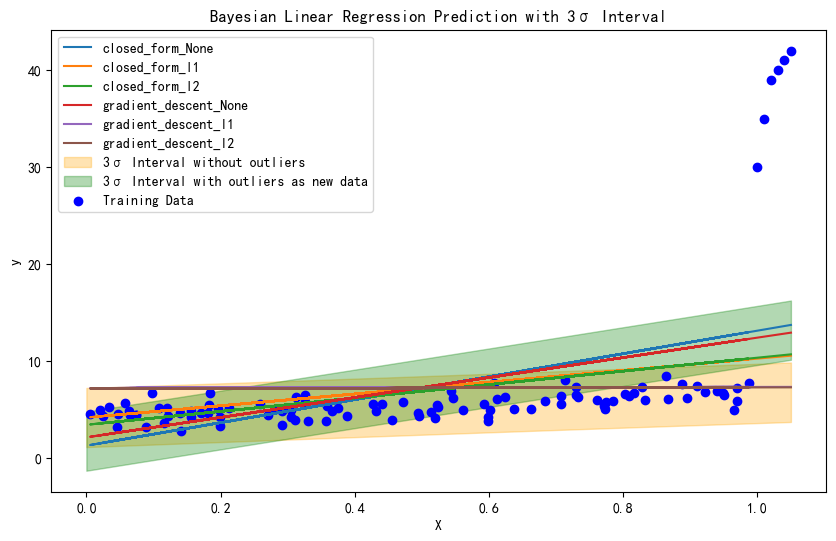

In [17]:
def plot_line(w, c, label=None):
    # Generate evenly spaced points between 0 and 1
    x = np.linspace(0, 1, 100).reshape(-1, 1)
    # Add bias term to the input features
    x_b = np.c_[np.ones((x.shape[0], 1)), x]
    # Calculate predicted values
    y = x_b.dot(w)
    # Plot the line
    plt.plot(x, y, c=c, label=label)

def bayes_pred(sigma,mean_posterior,theta_sigma_posterior,x):
    x_b = np.c_[np.ones((x.shape[0], 1)), x]
    y_pred_mean = x_b.dot(mean_posterior)
    y_pred_std = np.sqrt([sigma + x_b[i].dot(theta_sigma_posterior).dot(x_b[i].T) for i in range(len(x_b))]).reshape(-1, 1)
    return y_pred_mean,y_pred_std
    
def bayes_lr(sigma, X_b, y, theta_mu, theta_sigma_prior):
    # Compute posterior covariance matrix
    theta_sigma_posterior = np.linalg.inv(np.linalg.inv(theta_sigma_prior) + np.dot(X_b.T, X_b) / sigma**2)
    # Compute posterior mean
    mean_posterior = theta_sigma_posterior.dot(np.dot(X_b.T, y) / sigma**2 + np.linalg.inv(theta_sigma_prior).dot(theta_mu))
    return mean_posterior, theta_sigma_posterior

# Define parameters
sigma = 1
X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta_mu = np.zeros(X_b.shape[1]).reshape(-1, 1)
theta_sigma_prior = 1 * np.eye(X_b.shape[1])  # Prior covariance matrix
plot_x = np.linspace(0, 1.05, 100).reshape(-1, 1)
# Compute posterior parameters
mean_posterior, theta_sigma_posterior = bayes_lr(sigma, X_b[:100], y[:100], theta_mu, theta_sigma_prior)
outlier_posterior, outlier_sigma_posterior = bayes_lr(sigma, X_b[100:], y[100:], mean_posterior, theta_sigma_posterior)

# Compute posterior predictive distribution
y_pred_mean,y_pred_std = bayes_pred(sigma,mean_posterior,theta_sigma_posterior,plot_x)
y_outlier_mean,y_outlier_std = bayes_pred(sigma,outlier_posterior,outlier_sigma_posterior,plot_x)
# y_outlier_mean = X_b.dot(outlier_posterior)
# y_outlier_std = np.sqrt([sigma + X_b[i].dot(outlier_sigma_posterior).dot(X_b[i].T) for i in range(len(X_b))]).reshape(-1, 1)

# Plot results
plt.figure(figsize=(10, 6))

# Fill 3σ intervals without outliers
plt.fill_between(plot_x.ravel(), (y_pred_mean - 3 * y_pred_std).ravel(), (y_pred_mean + 3 * y_pred_std).ravel(), color='orange', alpha=0.3, label='3σ Interval without outliers')

# Fill 3σ intervals with outliers as new data
plt.fill_between(plot_x.ravel(), (y_outlier_mean - 3 * y_outlier_std).ravel(), (y_outlier_mean + 3 * y_outlier_std).ravel(), color='green', alpha=0.3, label='3σ Interval with outliers as new data')

# Plot training data
plt.scatter(X, y, color='blue', label='Training Data')

# Plot model predictions
for m in methods:
    for r in regs:
        plt.plot(X, models['{}_{}'.format(m, r)].predict(X), label='{}_{}'.format(m, r))

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Bayesian Linear Regression Prediction with 3σ Interval')
plt.legend()
plt.show()


## 3. Gaussian Process Regression

### 3.1 Weight Space Representation

In Gaussian Process Regression (GPR), we start by considering a linear regression model:

$$
y = \mathbf{w}^T \mathbf{x} + \epsilon
$$

where:
- $y$ is the target variable,
- $\mathbf{w}$ is a weight vector,
- $\mathbf{x}$ is the input feature vector,
- $\epsilon$ is the noise term assumed to be Gaussian with zero mean and variance $\sigma^2$.

In GPR, we define a prior distribution over the weights $\mathbf{w}$ using a multivariate Gaussian distribution:

$$
\mathbf{w} \sim \mathcal{N}(\mathbf{0}, \mathbf{K})
$$

where:
- $\mathbf{0}$ is the zero vector,
- $\mathbf{K}$ is the covariance matrix.

The covariance matrix $\mathbf{K}$ encodes the assumptions about the smoothness and correlations among the weights.

After observing the data, we can compute the posterior distribution over the weights given the observed data using Bayes' theorem.

### 3.2 Function Space Representation

In GPR, we are interested in modeling the underlying function $f(\mathbf{x})$ directly rather than the weights $\mathbf{w}$. We assume that the function $f(\mathbf{x})$ itself follows a Gaussian process:

$$
f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}'))
$$

where:
- $m(\mathbf{x})$ is the mean function,
- $k(\mathbf{x}, \mathbf{x}')$ is the covariance function (kernel).

The kernel function captures the assumptions about the smoothness and correlations in the function values across different input points.

Given the observed data $(\mathbf{X}, \mathbf{y})$, where $\mathbf{X}$ is the matrix of input features and \(\mathbf{y}\) is the vector of target values, we can compute the posterior distribution over the function values \(f(\mathbf{x})\) at new input points \(\mathbf{x}_*\) using the Gaussian process regression formula.

### 3.3 Conclusion

Gaussian Process Regression provides a flexible framework for modeling functions, allowing us to capture uncertainties and make predictions based on probabilistic principles. By representing the regression problem in both weight space and function space, we gain insight into how GPR leverages prior assumptions and observed data to infer the underlying function and make predictions.

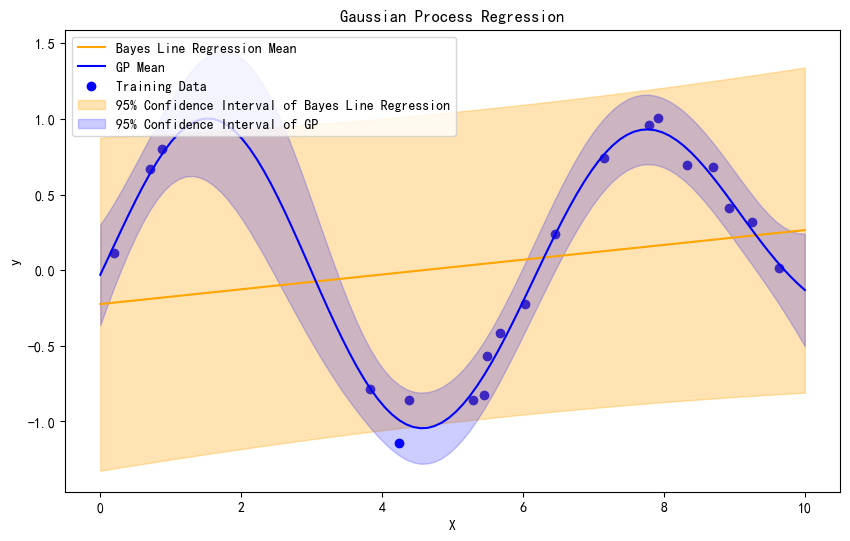

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# 生成带有噪声的合成数据
np.random.seed(0)
X = np.random.uniform(0, 10, 20)[:, np.newaxis]
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)

# 定义高斯过程回归模型
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 拟合模型
gp.fit(X, y)

# 生成测试数据
x_test = np.linspace(0, 10, 100)[:, np.newaxis]

# 进行预测
y_pred_gp, gp_sigma = gp.predict(x_test, return_std=True)
# Define parameters
sigma = 1
X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta_mu = np.zeros(X_b.shape[1]).reshape(-1, 1)
theta_sigma_prior = 1 * np.eye(X_b.shape[1])  # Prior covariance matrix

# Compute posterior parameters
mean_posterior, theta_sigma_posterior = bayes_lr(sigma, X_b[:100], y[:100], theta_mu, theta_sigma_prior)
y_pred_mean,y_pred_std = bayes_pred(sigma,mean_posterior,theta_sigma_posterior,x_test)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(x_test, y_pred_mean, c='orange', label='Bayes Line Regression Mean')
plt.plot(x_test, y_pred, c='blue', label='GP Mean')
plt.fill_between(x_test.ravel(), (y_pred_mean - y_pred_std).ravel(), (y_pred_mean + y_pred_std).ravel(), color='orange', alpha=0.3, label='95% Confidence Interval of Bayes Line Regression')
plt.fill_between(x_test.ravel(), y_pred - 2 * gp_sigma, y_pred + 2 * gp_sigma, color='blue', alpha=0.2, label='95% Confidence Interval of GP')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend(loc='upper left')
plt.show()
